In [75]:
import numpy as np
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('words')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [76]:
path = "/content/drive/MyDrive/Colab Notebooks/Transaction_Naration_Data_Set.csv"
df = pd.read_csv(path)

In [77]:
df.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [78]:
df = df.drop_duplicates(subset='NARATION')
narrations_init = df['NARATION'].fillna("")
print(narrations_init)
original_narrations = narrations_init

0                                               Cash Withdraw
1                              Cash Withdrawal From A/C No.: 
2            Cash withdraw from Micro Merchant point, MM A/C 
3           Credit Against Merchant Cash Withdraw Service ...
6                                   Cash Deposit to A/C No.: 
                                  ...                        
22538287                                         Guatala Udc 
22539045    Transaction For Fund Transfer. Smart App, Regu...
22539930                   Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261                    আসাদ ভাই এর কাছে জমা  হাজার টাকা 
22544595    গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস  সেবা  আদ...
Name: NARATION, Length: 128604, dtype: object


**Text Cleaning**

In [79]:
# lowercase

narrations = narrations_init.str.lower()
print(narrations)

0                                               cash withdraw
1                              cash withdrawal from a/c no.: 
2            cash withdraw from micro merchant point, mm a/c 
3           credit against merchant cash withdraw service ...
6                                   cash deposit to a/c no.: 
                                  ...                        
22538287                                         guatala udc 
22539045    transaction for fund transfer. smart app, regu...
22539930                   cash deposit গারামাসি উল্লী উন্নয়ন
22543261                    আসাদ ভাই এর কাছে জমা  হাজার টাকা 
22544595    গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস  সেবা  আদ...
Name: NARATION, Length: 128604, dtype: object


In [80]:
# special char and punctuation remove 

narrations = narrations.replace('[^A-Za-z ]+', '', regex=True)
print(narrations)

0                                               cash withdraw
1                                 cash withdrawal from ac no 
2              cash withdraw from micro merchant point mm ac 
3           credit against merchant cash withdraw service ...
6                                      cash deposit to ac no 
                                  ...                        
22538287                                         guatala udc 
22539045    transaction for fund transfer smart app regula...
22539930                                      cash deposit   
22543261                                                     
22544595                                                     
Name: NARATION, Length: 128604, dtype: object


In [81]:
# stop words removal

stopwords = stopwords.words('english')
narrations = narrations.apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
print(narrations)

0                                               cash withdraw
1                                          cash withdrawal ac
2                    cash withdraw micro merchant point mm ac
3                    credit merchant cash withdraw service ac
6                                             cash deposit ac
                                  ...                        
22538287                                          guatala udc
22539045    transaction fund transfer smart app regular fu...
22539930                                         cash deposit
22543261                                                     
22544595                                                     
Name: NARATION, Length: 128604, dtype: object


In [82]:
# tokenization

narrations = narrations.apply(lambda data: nltk.word_tokenize(data))
print(narrations)

0                                            [cash, withdraw]
1                                      [cash, withdrawal, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3             [credit, merchant, cash, withdraw, service, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transaction, fund, transfer, smart, app, regu...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [10]:
# stemming
ps = PorterStemmer()

def stem_narrations(data):
  return [ps.stem(word) for word in data]

stem_narrations = narrations.apply(lambda data: stem_narrations(data))
print(stem_narrations)

0                                            [cash, withdraw]
1                                        [cash, withdraw, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3              [credit, merchant, cash, withdraw, servic, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transact, fund, transfer, smart, app, regular...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [83]:
# lemmatization

lemmatizer=WordNetLemmatizer()

def lemma_narrations(data):
    return [lemmatizer.lemmatize(word) for word in data]


lemma_narrations = narrations.apply(lambda data: lemma_narrations(data))
print(lemma_narrations)

0                                            [cash, withdraw]
1                                      [cash, withdrawal, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3             [credit, merchant, cash, withdraw, service, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transaction, fund, transfer, smart, app, regu...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [84]:
narrations = lemma_narrations

In [85]:
# named entity remove(name, place, bangla written in english and other non-english words except some relevant non-english words)
# using nltk

words = set(nltk.corpus.words.words())
ignored_words = ['eftn', 'ft', 'bkash', 'nogod', 'rtgs', 'pos', 
                 'cib', 'paywell', 'challan', 'npsb']    # will be given in the chat
temp = []

for w in narrations:
  c = []
  for x in w:
    if x in words or not x.isalpha() or x in ignored_words:
     c.append(x)
  
  temp.append(c)
  
len(temp)

128604

In [13]:
# using spacy (NER)

import spacy
from spacy import displacy 
nlp = spacy.load('en_core_web_sm')

NER_lists = set()

for x in temp:
  t = str(x)
  # t = re.sub('[^A-Za-z ]+', '', t)
  doc = nlp(t)
  
  for ent in doc.ents:
     s = re.sub('[^A-Za-z ]+', '', ent.text)
     if s not in ignored_words:
       NER_lists.add(s)

print(NER_lists)

{'eighteen', 'week', 'two', 'bakula', 'khan', 'bari', 'fourteen', 'hour', 'zero', 'abu', 'german', 'noon', 'second', 'month', 'mim', 'monthly', 'china', 'al', 'year', 'fifteen', 'daily', 'kokan', 'nova', 'shanghai', 'twelve', 'annual', 'martin', 'today', 'quarterly', 'sec', 'august', 'japan', 'yesterday', 'weekly', 'patwari', 'gore', 'june', 'first'}


In [86]:
NER_lists = {'eighteen', 'week', 'two', 'bakula', 'khan', 'bari', 'fourteen', 'hour', 'zero', 'abu', 'german', 'noon', 'second', 'month', 'mim', 'monthly', 'china', 'al', 'year', 'fifteen', 'daily', 'kokan', 'nova', 'shanghai', 'twelve', 'annual', 'martin', 'today', 'quarterly', 'sec', 'august', 'japan', 'yesterday', 'weekly', 'patwari', 'gore', 'june', 'first'}

In [87]:
# as the previous cannot detect all irrelevant words. that's why, we add some words manually including what we have found before

added_lists = ["hour","month","week","year","zero","abu","al",'annual','bakula','bari','china','daily','eighteen','fifteen','first','fourteen',
 'german','gore','japan','khan','kokan',"martin",'mim','monthly','noon','nova',"patwari",'quarterly','sec','second','shanghai','today','twelve','two','weekly',
 'yesterday', 'ae', 'ad', 'mo', 'dada', 'hanif', 'brother', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november',
  'december', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'ka', 'mu', 'c', 'st', 'ar', 'dola', 'warish', 'kaka', 'sima', 'point', 
  'service', 'palli', 'dal', 'p', 'u', 'e', 'i', 'm', 'da', 'r', 'pu', 'hasan', 'begum', 'nandi', 'mullah', 'ge', 'amt']

for x in added_lists:
  NER_lists.add(x)

print(NER_lists)

{'week', 'two', 'kaka', 'bari', 'abu', 'p', 'german', 'mim', 'monthly', 'm', 'kokan', 'nova', 'september', 'palli', 'da', 'ar', 'quarterly', 'mullah', 'patwari', 'mar', 'first', 'december', 'february', 'feb', 'i', 'jul', 'c', 'may', 'sep', 'july', 'ad', 'zero', 'amt', 'fifteen', 'al', 'daily', 'ge', 'august', 'japan', 'jan', 'aug', 'hanif', 'point', 'jun', 'apr', 'ka', 'fourteen', 'u', 'mu', 'st', 'second', 'october', 'month', 'nandi', 'martin', 'sec', 'march', 'pu', 'yesterday', 'oct', 'mo', 'weekly', 'brother', 'dec', 'e', 'warish', 'service', 'hasan', 'dada', 'eighteen', 'begum', 'bakula', 'khan', 'r', 'hour', 'nov', 'ae', 'noon', 'china', 'november', 'year', 'january', 'shanghai', 'twelve', 'annual', 'today', 'dal', 'gore', 'june', 'april', 'dola', 'sima'}


In [88]:
final = []

for w in temp:
  c = []
  for x in w:
    if str(x) not in NER_lists:
     c.append(x)
  
  final.append(c)
  
# final

In [89]:
# remove empty narrations

temp1 = []
temp2 = []
for index, narration in enumerate(final):
  if len(narration) != 0:
    temp1.append(original_narrations.iloc[index])
    temp2.append(narration)
  # else:
  #   print(original_narrations.iloc[index])

print(len(temp1))
print(len(temp2))

108032
108032


In [90]:
original_narrations = temp1
narrations = temp2

**Pre-Process a new text**

In [91]:
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
st = set(stopwords.words("english"))

def preprocess(s):
  s = str(s)
  s = s.lower()
  # print(s)
  s = re.sub('[^A-Za-z ]+', '', s)
  # print(s)
  s = ' '.join(word.lower() for word in s.split() if word not in st)
  # print(s)
  s = nltk.word_tokenize(s)
  # print(s)
  s = [lemmatizer.lemmatize(word) for word in s]

  t = []
  for x in s:
    if (x in words or not x.isalpha() or x in ignored_words) and x not in NER_lists:
      t.append(x)

  return t

print(preprocess("Debit Against Palli Bidyut Bill Collections."))

['debit', 'bill', 'collection']


**Text Exploratory Analysis**

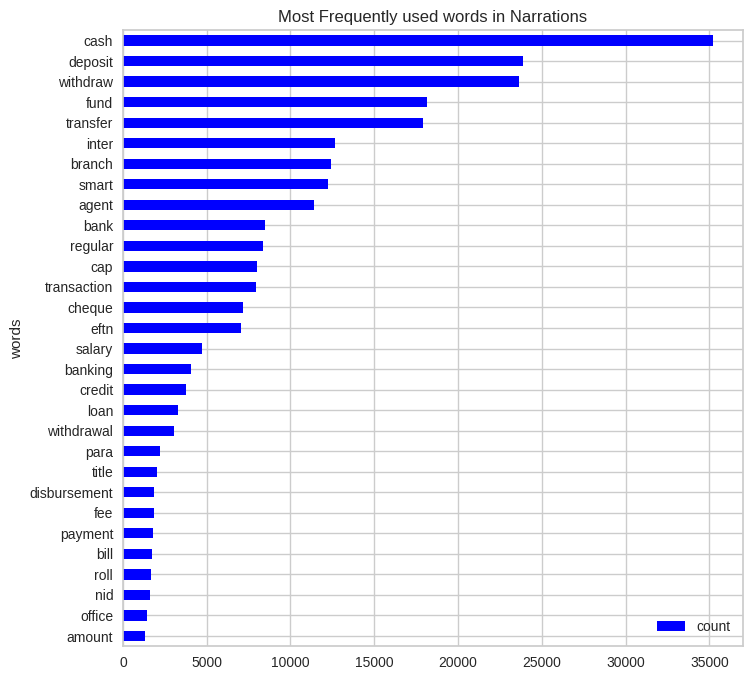

In [92]:
# visualize most frequent words

import itertools
import collections
import matplotlib.pyplot as plt

lemmatized_tokens = list(narrations)
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_tweets = pd.DataFrame(counts_no.most_common (30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
ax.set_title("Most Frequently used words in Narrations")

plt.show()

**Featured Engineering**

**Word2Vec**

In [93]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=narrations, workers=1, seed=42)

In [94]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(narrations, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(108032, 100)

**Clustering**

In [95]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

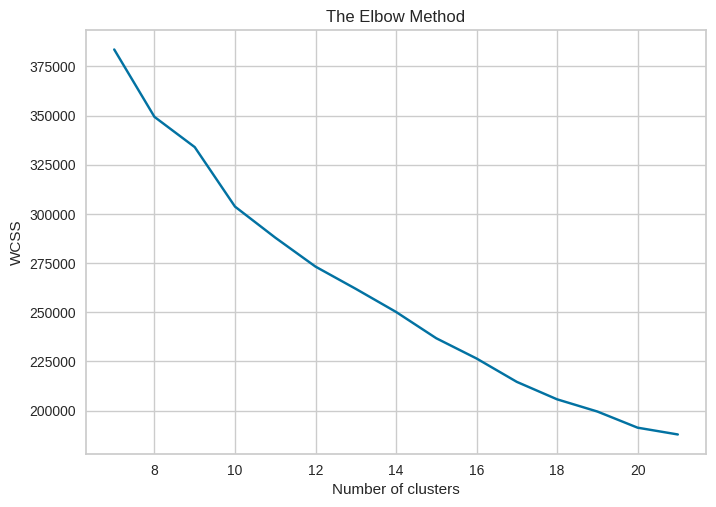

In [55]:
# Elbow Method analysis

wcss = []

for i in range(7,22):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(vectorized_docs)
    wcss.append(kmeans.inertia_)

plt.plot(range(7,22),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

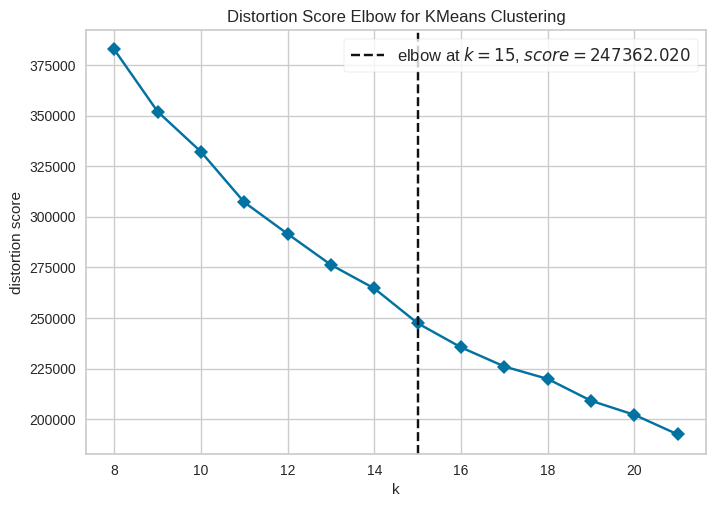

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(8,22), timings= False)
visualizer.fit(np.array(vectorized_docs))        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

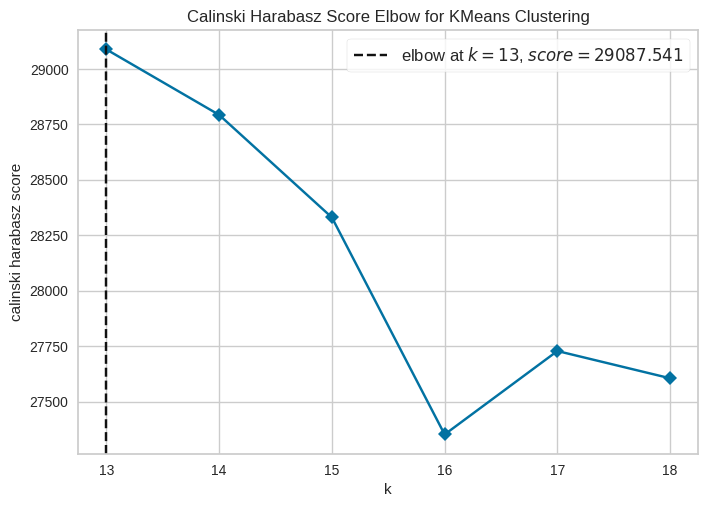

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [36]:
# calinski_harabasz score analysis

visualizer = KElbowVisualizer(model, k=(13,19),metric='calinski_harabasz', timings= False)
visualizer.fit(vectorized_docs)        # Fit the data to the visualizer
visualizer.show()

In [97]:
KMeans_cluster_size = 14
kmeans = KMeans(n_clusters=KMeans_cluster_size, n_init=10,random_state=42)
kmeans.fit(vectorized_docs)

KMeans(n_clusters=14, n_init=10, random_state=42)

In [98]:
df_clusters_KMeans = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "kmeans_cluster": kmeans.labels_
})

df_clusters_KMeans

,narrations,tokens,kmeans_cluster
0,Cash Withdraw,"[cash, withdraw]",2
1,Cash Withdrawal From A/C No.:,"[cash, withdrawal]",8
2,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",1
3,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",1
4,Cash Deposit to A/C No.:,"[cash, deposit]",5
...,...,...,...
108027,"Smart App, Fund Transfer. wife DPS Money","[smart, fund, transfer, wife, money]",7
108028,Cash Deposit Suraighat bazar SME,"[cash, deposit]",5
108029,Cash Deposit Raigor Mohila dol,"[cash, deposit]",5
108030,"Transaction For Fund Transfer. Smart App, Regu...","[transaction, fund, transfer, smart, regular, ...",7


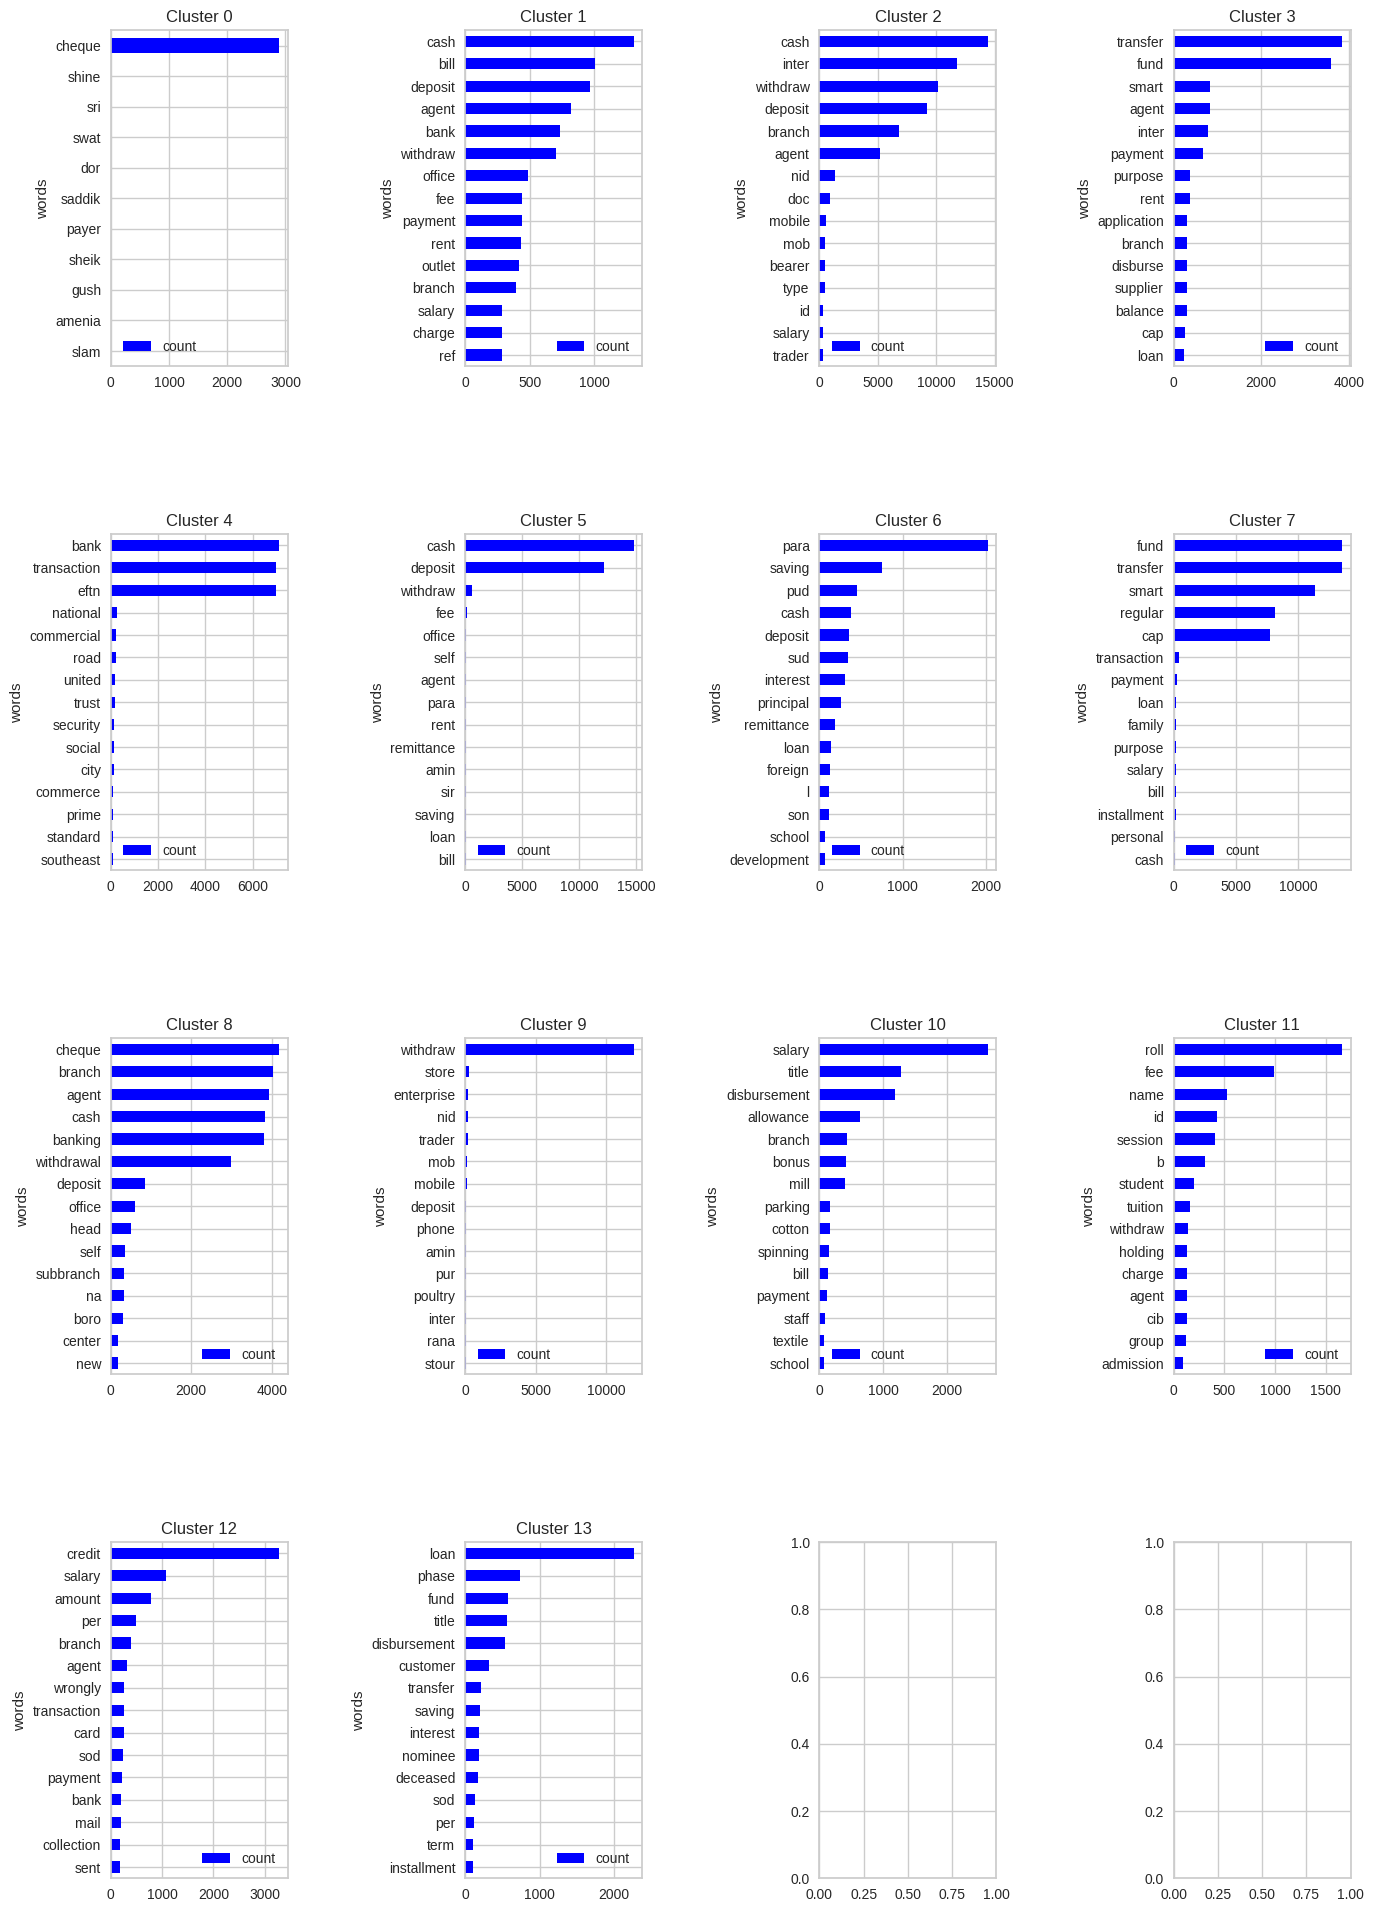

In [99]:
# frequency plot per cluster (K-means)

import itertools
import collections
import matplotlib.pyplot as plt

def perClusterPlot(arr,ax,title):
  lemmatized_tokens = list(arr['tokens'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  clean_tweets = pd.DataFrame(counts_no.most_common (15), columns=['words', 'count'])
  clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue', title=title)


fig, ax = plt.subplots(nrows=int(KMeans_cluster_size / 4 + 1), ncols=4, figsize=(16, 24))
plt.subplots_adjust(wspace=1, hspace=0.5)
axe = ax.ravel()
for i in range(KMeans_cluster_size):
   perClusterPlot(df_clusters_KMeans[df_clusters_KMeans["kmeans_cluster"] == i], axe[i], "Cluster " + str(i))

plt.show()

**Mini Batch K Means**

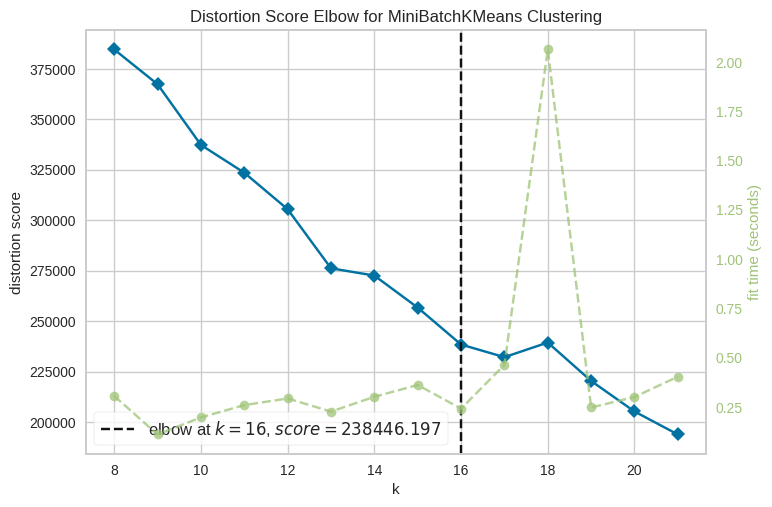

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
model = MiniBatchKMeans(batch_size=1024)
visualizer = KElbowVisualizer(model, k=(8,22), timings= True)
visualizer.fit(np.array(vectorized_docs))        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

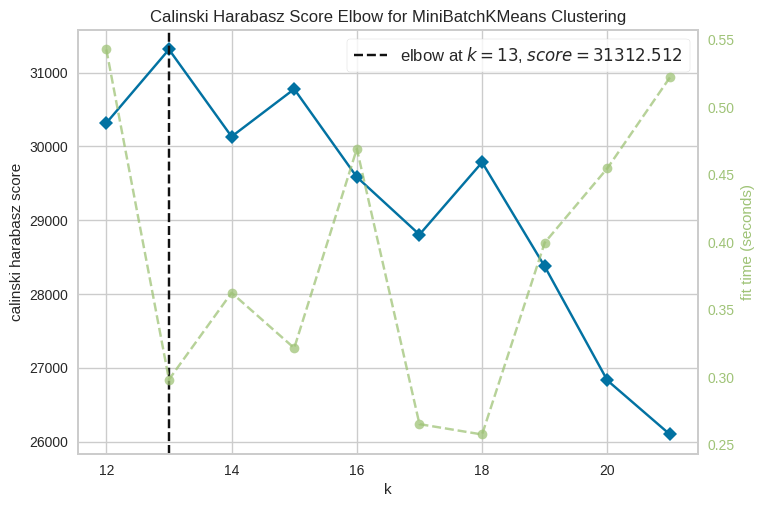

<Axes: title={'center': 'Calinski Harabasz Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [101]:
visualizer = KElbowVisualizer(model, k=(12,22), metric='calinski_harabasz', timings= True)
visualizer.fit(vectorized_docs)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [102]:
batch_cluster_size = 14

km_batch = MiniBatchKMeans(n_clusters=batch_cluster_size, batch_size=1024).fit(vectorized_docs)

df_clusters_minibatch = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "cluster": km_batch.labels_
})

df_clusters_minibatch

,narrations,tokens,cluster
0,Cash Withdraw,"[cash, withdraw]",7
1,Cash Withdrawal From A/C No.:,"[cash, withdrawal]",12
2,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",4
3,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",4
4,Cash Deposit to A/C No.:,"[cash, deposit]",13
...,...,...,...
108027,"Smart App, Fund Transfer. wife DPS Money","[smart, fund, transfer, wife, money]",5
108028,Cash Deposit Suraighat bazar SME,"[cash, deposit]",13
108029,Cash Deposit Raigor Mohila dol,"[cash, deposit]",13
108030,"Transaction For Fund Transfer. Smart App, Regu...","[transaction, fund, transfer, smart, regular, ...",5


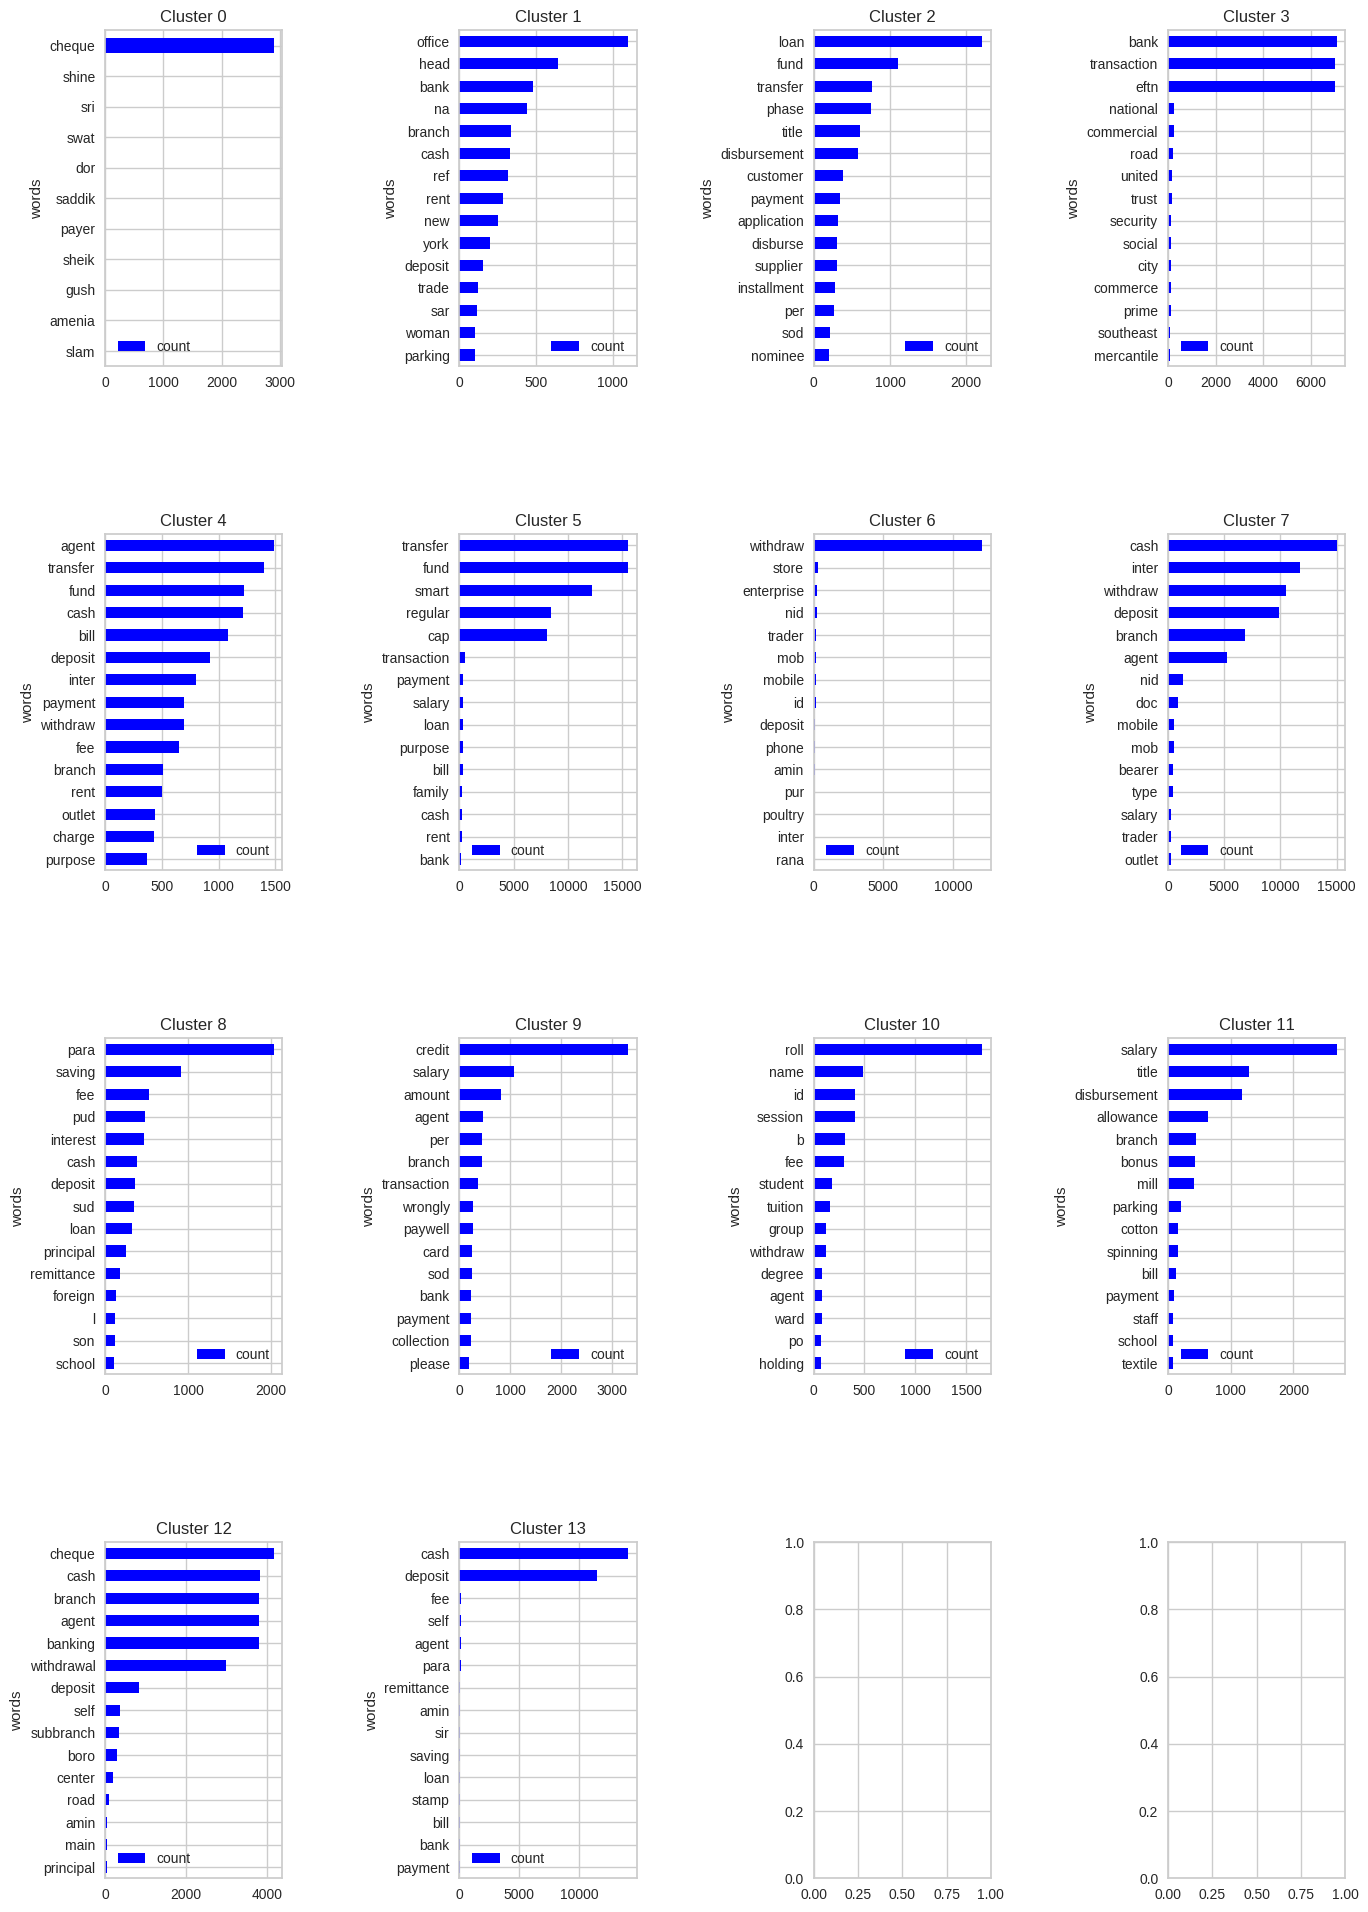

In [103]:
# frequency plot per cluster (mini batch K-means)

import itertools
import collections
import matplotlib.pyplot as plt

def perClusterPlot(arr,ax,title):
  lemmatized_tokens = list(arr['tokens'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  clean_tweets = pd.DataFrame(counts_no.most_common (15), columns=['words', 'count'])
  clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue', title=title)


fig, ax = plt.subplots(nrows=int(batch_cluster_size / 4 + 1), ncols=4, figsize=(16, 24))
plt.subplots_adjust(wspace=1, hspace=0.5)
axe = ax.ravel()
for i in range(batch_cluster_size):
   perClusterPlot(df_clusters_minibatch[df_clusters_minibatch["cluster"] == i], axe[i], "Cluster " + str(i))

plt.show()

In [104]:
df_clusters_all = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "kmeans_cluster": kmeans.labels_,
    "minibatch_cluster": km_batch.labels_
})

df_clusters_all

,narrations,tokens,kmeans_cluster,minibatch_cluster
0,Cash Withdraw,"[cash, withdraw]",2,7
1,Cash Withdrawal From A/C No.:,"[cash, withdrawal]",8,12
2,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",1,4
3,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",1,4
4,Cash Deposit to A/C No.:,"[cash, deposit]",5,13
...,...,...,...,...
108027,"Smart App, Fund Transfer. wife DPS Money","[smart, fund, transfer, wife, money]",7,5
108028,Cash Deposit Suraighat bazar SME,"[cash, deposit]",5,13
108029,Cash Deposit Raigor Mohila dol,"[cash, deposit]",5,13
108030,"Transaction For Fund Transfer. Smart App, Regu...","[transaction, fund, transfer, smart, regular, ...",7,5


In [105]:
df_clusters_all.to_csv("result.csv")

**prediction of data**

In [106]:
# load test file

test_path = "/content/drive/MyDrive/Colab Notebooks/Test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6
0,1,1175256,342800.0,1-Nov-22,Cash Withdrawal From A/C No.:,Credit,1
1,2,2298226,1500.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9
2,3,4066427,1500.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9
3,4,1978564,2550.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9
4,5,4890311,2550.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9


In [107]:
# preprocessing and vectorization

test_narrations = df_test["0.4"]

preprocessed = []
for te in test_narrations:
  preprocessed.append(preprocess(te))

vectorized_test = vectorize(preprocessed, model=Word2Vec(sentences=preprocessed, workers=1, seed=42))
len(vectorized_test), len(vectorized_test[0])

(55, 100)

**KMeans Prediction**

In [108]:
test_kmeans_labels = kmeans.fit_predict(vectorized_test)
test_kmeans_labels

array([ 5,  6,  0,  6,  0,  3,  3,  3, 10,  6,  0,  2,  7,  2,  1,  6,  0,
        3,  3,  9,  5,  1,  2,  9,  5,  2,  0,  0, 13,  4,  7,  5,  3,  3,
        2,  9,  5,  6,  0,  6,  0,  3,  3,  9, 11, 12,  1,  2,  4,  2,  1,
        8,  4,  1, 11], dtype=int32)

In [109]:
df_clusters_KMeans_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "test_labels": df_test["0.6"],
    "kmeans_cluster": test_kmeans_labels
})

df_clusters_KMeans_test

,narrations,test_labels,kmeans_cluster
0,Cash Withdrawal From A/C No.:,1,5
1,"Cash withdraw from Micro Merchant point, MM A/C",9,6
2,Credit Against Merchant Cash Withdraw Service ...,9,0
3,"Cash withdraw from Micro Merchant point, MM A/C",9,6
4,Credit Against Merchant Cash Withdraw Service ...,9,0
5,Cash Deposit to A/C No.:,2,3
6,Cash Deposit,2,3
7,Cash Deposit to A/C No.:,2,3
8,Credit Against Merchant Purchase Payment Servi...,10,10
9,"Cash withdraw from Micro Merchant point, MM A/C",9,6


**Minibatch KMeans Prediction**

In [110]:
test_minibatch_labels = km_batch.fit_predict(vectorized_test)
test_minibatch_labels

array([ 9,  5,  0,  5,  0,  3,  3,  3, 12,  5,  0,  1, 11,  1,  2,  5,  0,
        3,  3,  8,  9,  2,  1,  8,  9,  1,  0,  0,  4,  6, 11,  9,  3,  3,
        1,  8,  9,  5,  0,  5,  0,  3,  3,  8, 10,  5,  2,  1,  6,  1,  2,
        7,  6,  2, 10], dtype=int32)

In [112]:
df_clusters_minibatch_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "test_labels": df_test["0.6"],
    "minibatch_cluster": test_minibatch_labels
})

df_clusters_minibatch_test

,narrations,test_labels,minibatch_cluster
0,Cash Withdrawal From A/C No.:,1,9
1,"Cash withdraw from Micro Merchant point, MM A/C",9,5
2,Credit Against Merchant Cash Withdraw Service ...,9,0
3,"Cash withdraw from Micro Merchant point, MM A/C",9,5
4,Credit Against Merchant Cash Withdraw Service ...,9,0
5,Cash Deposit to A/C No.:,2,3
6,Cash Deposit,2,3
7,Cash Deposit to A/C No.:,2,3
8,Credit Against Merchant Purchase Payment Servi...,10,12
9,"Cash withdraw from Micro Merchant point, MM A/C",9,5


In [113]:
df_clusters_all_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "tokens": preprocessed,
    "test_labels": df_test["0.6"],
    "kmeans_cluster": test_kmeans_labels,
    "minibatch_cluster": test_minibatch_labels
})

df_clusters_all_test

,narrations,tokens,test_labels,kmeans_cluster,minibatch_cluster
0,Cash Withdrawal From A/C No.:,"[cash, withdrawal]",1,5,9
1,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",9,6,5
2,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",9,0,0
3,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",9,6,5
4,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",9,0,0
5,Cash Deposit to A/C No.:,"[cash, deposit]",2,3,3
6,Cash Deposit,"[cash, deposit]",2,3,3
7,Cash Deposit to A/C No.:,"[cash, deposit]",2,3,3
8,Credit Against Merchant Purchase Payment Servi...,"[credit, merchant, purchase, payment]",10,10,12
9,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",9,6,5


In [114]:
df_clusters_all_test.to_csv('test_result.csv')

In [44]:
while 1:
  pass

KeyboardInterrupt: ignored